In [ ]:
#%pip install xarray netCDF4 cftime
import xarray as xr
import numpy as np
try:
    ds = xr.open_dataset("CCMP_RT_Wind_Analysis_20230101_V02.1_L3.0_RSS.nc", decode_times=False)
    print(ds)
    u10 = ds["uwnd"]
    print("\nInformações da variável uwnd:")
    print(u10.attrs)
    
except Exception as e:
    print(f"Erro ao abrir o arquivo: {str(e)}")

<xarray.Dataset> Size: 43MB
Dimensions:    (longitude: 1440, latitude: 628, time: 4)
Coordinates:
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 3kB -78.38 -78.12 -77.88 ... 77.88 78.12 78.38
  * time       (time) float64 32B 3.156e+05 3.156e+05 3.156e+05 3.156e+05
Data variables:
    uwnd       (time, latitude, longitude) float32 14MB ...
    vwnd       (time, latitude, longitude) float32 14MB ...
    nobs       (time, latitude, longitude) float32 14MB ...
Attributes: (12/36)
    contact:                    Remote Sensing Systems, support@remss.com
    Conventions:                CF-1.6
    data_structure:             grid
    title:                      RSS CCMP_RT V2.1 derived surface winds (Level...
    history:                    20230116T130634ZZ - netCDF generated from ori...
    description:                RSS VAM 6-hour analyses starting from the NCE...
    ...                         ...
    contributor_name:  

In [3]:
ds

<xarray.Dataset> Size: 43MB
Dimensions:    (longitude: 1440, latitude: 628, time: 4)
Coordinates:
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 3kB -78.38 -78.12 -77.88 ... 77.88 78.12 78.38
  * time       (time) float64 32B 3.156e+05 3.156e+05 3.156e+05 3.156e+05
Data variables:
    uwnd       (time, latitude, longitude) float32 14MB ...
    vwnd       (time, latitude, longitude) float32 14MB ...
    nobs       (time, latitude, longitude) float32 14MB ...
Attributes: (12/36)
    contact:                    Remote Sensing Systems, support@remss.com
    Conventions:                CF-1.6
    data_structure:             grid
    title:                      RSS CCMP_RT V2.1 derived surface winds (Level...
    history:                    20230116T130634ZZ - netCDF generated from ori...
    description:                RSS VAM 6-hour analyses starting from the NCE...
    ...                         ...
    contributor_name:           Carl Mears, Joel Scott, Frank Wentz, Ross Hof...
    contributor_role:           Co-Investigator, Software Engineer, Project L...
    processing_level:           L3.0
    keywords:                   surface winds, ocean winds, wind speed/wind d...
    keywords_vocabulary:        GCMD Science Keywords
    references:                 Mears et al., Journal of Geophysical Research...

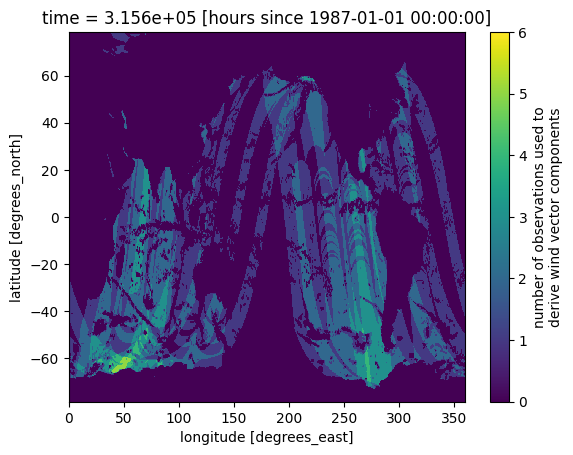

In [4]:
ds.isel(time = slice(1)).nobs.plot()


In [5]:
# Defina o ponto de interesse
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

latitude = 30.0
longitude = -90.0

# Selecionar o ponto mais próximo
ponto = ds.sel(latitude=latitude, longitude=longitude, method="nearest")
    # Extrair informações de tempo
tempo_bruto = ds.time.values
unidade = ds.time.attrs['units']
calendario = 'standard'
    
    # Converter para objetos cftime
tempos_cftime = cftime.num2date(tempo_bruto, units=unidade, calendar=calendario)
print("Horários disponíveis:")
print(tempos_cftime)
import matplotlib.pyplot as plt
import numpy as np

# Criar uma lista com as velocidades calculadas
velocidades = []
horarios = []

import matplotlib.pyplot as plt
import numpy as np

# Criar listas para armazenar velocidades do vento em m/s e em nós
velocidades_ms = []
velocidades_knots = []
horarios = []

for i, data in enumerate(tempos_cftime):  
    ano = data.year
    mes = data.month
    dia = data.day
    hora = data.hour
    
    # Pegando os valores de uwnd e vwnd no instante i
    uwnd = ponto['uwnd'].values[i]  
    vwnd = ponto['vwnd'].values[i]
    
    # Calculando a velocidade do vento em m/s
    velocidade_ms = np.sqrt(uwnd**2 + vwnd**2)
    
    # Convertendo para nós
    velocidade_knots = velocidade_ms * 1.94384

    velocidades_ms.append(velocidade_ms)
    velocidades_knots.append(velocidade_knots)
    horarios.append(f"{ano}-{mes:02d}-{dia:02d} {hora:02d}:00")  # Formatando a data para o eixo X

    # Impressão dos valores
    print(f"{ano}-{mes:02d}-{dia:02d} {hora:02d}:00 -> Velocidade: {velocidade_ms:.2f} m/s ({velocidade_knots:.2f} nós)")
    print(f"uwnd = {uwnd:.2f}, vwnd = {vwnd:.2f}")
 
# Mostrar estatísticas básicas
#print("\nEstatísticas da velocidade do vento:")
#print(f"Média: {velocidades_knots.mean().values:.2f} m/s")
#print(f"Máxima: {velocidades_knots.max().values:.2f} m/s")
#print(f"Mínima: {velocidades_knots.min().values:.2f} m/s")
#print(f"Desvio padrão: {velocidades_knots.std().values:.2f} m/s")

# Plotar a série temporal da velocidade do ventoimport matplotlib.pyplot as plt

# Criar o histograma das velocidades em m/s
plt.figure(figsize=(8, 4))
plt.hist(velocidades_knots, bins=10, edgecolor='black', alpha=0.7, label="Velocidade do Vento (nós)")
plt.title("Histograma da Velocidade do Vento")
plt.xlabel("Velocidade do Vento (nós)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Adiciona grade apenas no eixo Y
plt.legend()
plt.show()

#plt.figure(figsize=(10, 4))
#plt.plot(horarios, velocidades_ms, marker='o', linestyle='-', label="Velocidade do Vento (m/s)")
#plt.plot(horarios, velocidades_knots, marker='s', linestyle='--', label="Velocidade do Vento (nós)", color='r')
#plt.xticks(rotation=45)  # Melhorar a visualização do eixo X
#plt.title(f"Série Temporal da Velocidade do Vento em ({latitude}, {longitude})")
#plt.xlabel("Tempo")
#plt.ylabel("Velocidade do Vento")
#plt.grid(True)
#plt.legend()
#plt.show()

NameError: name 'cftime' is not defined